In [9]:
x = list(range(10))
y = [1,1,2,4,5,7,8,9,9,10]

print(len(y))
print(len(x))

10
10


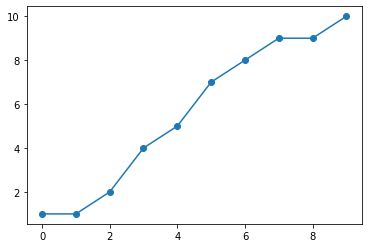

In [14]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.scatter(x,y)

In [20]:
# Hypothesis Define
class H():

  def __init__(self, w):
    self.w = w

  def forward(self, x):
    return self.w * x

# Cost Function Define
def cost(h, x, y):
  error = 0
  for i in range(len(x)):
    error += (h.forward(x[i]) - y[i])**2
  error = error / len(x)
  return error
  
h = H(4)
cost(h, x, y)

222.2

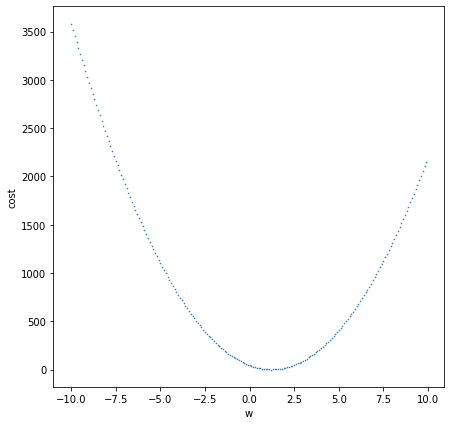

In [36]:
list_w = []
list_c = []
for i in range(-100, 100):
  w = i * 0.1
  h = H(w)
  c = cost(h, x, y)
  list_w.append(w)
  list_c.append(c)

plt.figure(figsize=(7,7))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=0.3)

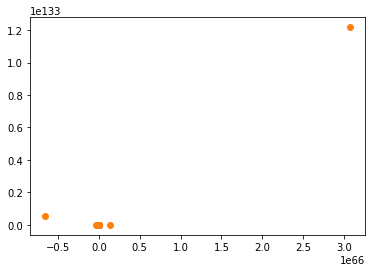

In [56]:
def cal_grad(w, cost):
  h = H(w)
  cost1 = cost(h, x, y)
  eps = 0.0001
  h = H(w+eps)
  cost2 = cost(h, x, y)
  dcost = cost2 - cost1
  dw = eps
  grad = dcost / dw
  return grad, (cost1 + cost2)*0.5

def cal_grad2(w, cost):
  h = H(w)
  grad = 0
  for i in range(len(x)):
    grad += 2 * (h.forward(x[i]) - y[i]) * x[i]
  grad = grad / len(x)
  c = cost(h, x, y)
  return grad, c

w1=1.4
w2=1.4
lr = 0.1
list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):
  grad, mean_cost = cal_grad(w1, cost)
  grad2, mean_cost2 = cal_grad2(w2, cost)
  
  w1 -= lr * grad
  w2 -= lr * grad2
  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost)
  list_c2.append(mean_cost2)

plt.scatter(list_w1, list_c1)
plt.scatter(list_w2, list_c2)